<a href="https://colab.research.google.com/gist/PutinVVV/315fb88d8ba0cd9d475976a6ce820edf/untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Цель**: бинарная классификация, предсказать fraudulent (1 — фейк, 0 — реальная вакансия)




**Признаки**: тексты (title, description, requirements, benefits, company_profile), категории (employment_type, industry, function, required_experience/education, department, location), булевы (telecommuting, has_company_logo, has_questions)


# 1.Загрузка данных


In [2]:
from google.colab import files
uploaded = files.upload()
import pandas as pd
import io
df = pd.read_csv(io.BytesIO(uploaded['fake_job_postings.csv']))
df.shape, df.columns.tolist()[:10]



Saving fake_job_postings.csv to fake_job_postings.csv


((17880, 18),
 ['job_id',
  'title',
  'location',
  'department',
  'salary_range',
  'company_profile',
  'description',
  'requirements',
  'benefits',
  'telecommuting'])

# 2. Разбить данные

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split

target_col = "fraudulent"
text_cols = ["title","company_profile","description","requirements","benefits"]
cat_cols = ["employment_type","required_experience","required_education","industry","function","department","location"]
bool_cols = ["telecommuting","has_company_logo","has_questions"]

for c in text_cols + cat_cols + bool_cols + [target_col]:
    assert c in df.columns, f"Нет колонки: {c}"

X = df[text_cols + cat_cols + bool_cols].copy()
y = df[target_col].astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
X_train.shape, X_test.shape, y_train.value_counts(normalize=True), y_test.value_counts(normalize=True)


((14304, 15),
 (3576, 15),
 fraudulent
 0    0.951552
 1    0.048448
 Name: proportion, dtype: float64,
 fraudulent
 0    0.951622
 1    0.048378
 Name: proportion, dtype: float64)

# 3. Визуализировать данные

In [5]:
print(df.shape)
df.info()

df.head()



(17880, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  obje

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


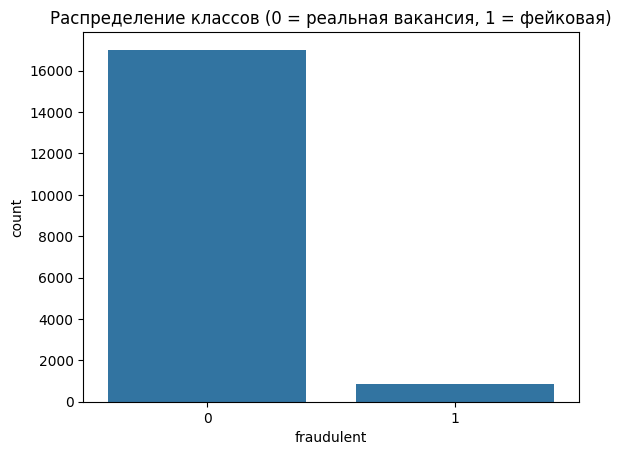

,proportion
fraudulent,
0,0.951566
1,0.048434


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="fraudulent", data=df)
plt.title("Распределение классов (0 = реальная вакансия, 1 = фейковая)")
plt.show()

df["fraudulent"].value_counts(normalize=True)


In [7]:
for col in ["description", "requirements", "company_profile", "benefits"]:
    df[col + "_len"] = df[col].fillna("").str.len()

df[["description_len","requirements_len","company_profile_len","benefits_len"]].describe()


,description_len,requirements_len,company_profile_len,benefits_len
count,17880.000000,17880.000000,17880.000000,17880.000000
mean,1218.004418,590.132215,620.901454,208.895694
std,894.828620,613.191270,567.454100,337.077357
min,0.000000,0.000000,0.000000,0.000000
25%,607.000000,146.000000,138.000000,0.000000
50%,1017.000000,467.000000,570.000000,45.000000
75%,1586.000000,820.000000,879.000000,294.000000
max,14907.000000,10864.000000,6178.000000,4429.000000


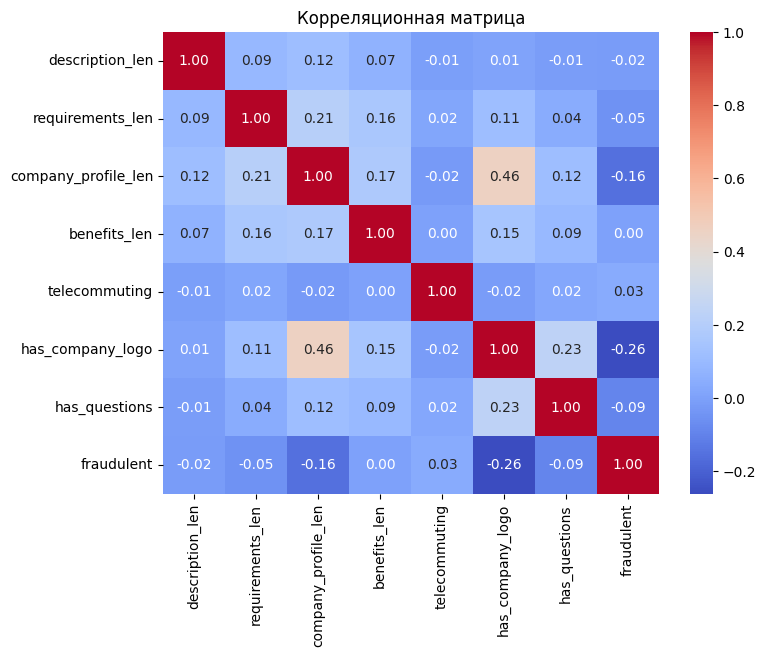

In [8]:
num_cols = ["description_len","requirements_len","company_profile_len","benefits_len"]
bool_cols = ["telecommuting","has_company_logo","has_questions"]

corr = df[num_cols + bool_cols + ["fraudulent"]].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Корреляционная матрица")
plt.show()


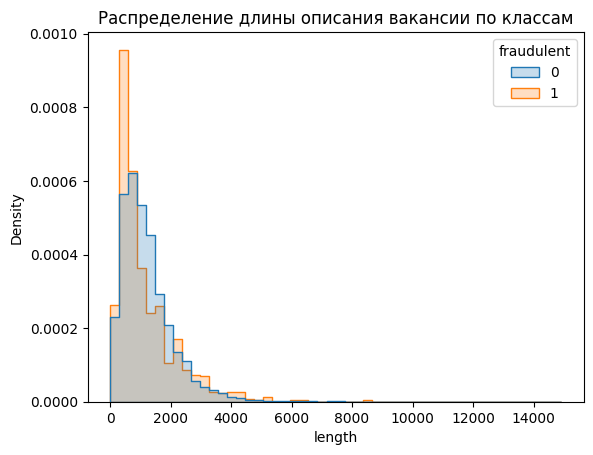

In [10]:
df_long = df.melt(id_vars=["fraudulent"], value_vars=["description_len"], var_name="text_length_type", value_name="length")

sns.histplot(data=df_long, x="length", bins=50, hue="fraudulent", element="step", stat="density", common_norm=False)
plt.title("Распределение длины описания вакансии по классам")
plt.show()

# 4. Обработка пропусков

In [18]:

df.isnull().sum().sort_values(ascending=False).head(15)

for col in text_cols:
    df[col] = df[col].fillna("")

for col in cat_cols:
    df[col] = df[col].fillna("missing")

for col in bool_cols:
    df[col] = df[col].fillna(0)


# 5. Обработка категориальных признаков

In [21]:
encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
X_cat = encoder.fit_transform(df[cat_cols])

encoded_feature_names = encoder.get_feature_names_out(cat_cols)

print("Пример новых признаков:", encoded_feature_names[:20])
print("Всего признаков:", len(encoded_feature_names))




Пример новых признаков: ['employment_type_Contract' 'employment_type_Full-time'
 'employment_type_Other' 'employment_type_Part-time'
 'employment_type_Temporary' 'employment_type_missing'
 'required_experience_Associate' 'required_experience_Director'
 'required_experience_Entry level' 'required_experience_Executive'
 'required_experience_Internship' 'required_experience_Mid-Senior level'
 'required_experience_Not Applicable' 'required_experience_missing'
 'required_education_Associate Degree'
 "required_education_Bachelor's Degree" 'required_education_Certification'
 'required_education_Doctorate'
 'required_education_High School or equivalent'
 "required_education_Master's Degree"]
Всего признаков: 4642


# 6. Нормализация числовых признаков

In [31]:
from sklearn.preprocessing import StandardScaler

num_cols = ["description_len","requirements_len","company_profile_len","benefits_len"]

scaler = StandardScaler()
X_num = scaler.fit_transform(df[num_cols])

print("Пример нормализованных числовых признаков:")
print(X_num[:5])


Пример нормализованных числовых признаков:
[[-0.34980237  0.42706921  0.46542255 -0.6197436 ]
 [ 0.95998226  1.37459778  1.17210739  3.21331165]
 [-0.96446239  1.26043771  0.45484871 -0.6197436 ]
 [ 1.54446807  1.36807434 -0.01216248  1.70026352]
 [ 0.33749929  0.27213768  1.77481617 -0.55744162]]


# 7. Запуск классификатора (KNN)

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_val_score
from scipy.sparse import hstack

X_full = hstack([X_desc, X_req, X_cat, X_num])
y = df["fraudulent"].astype(int)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_full, y, test_size=0.2, stratify=y, random_state=42
)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)

print("Train Accuracy:", accuracy_score(y_train, y_pred_train))
print("Test  Accuracy:", accuracy_score(y_test, y_pred_test))
print("Train F1:", f1_score(y_train, y_pred_train))
print("Test  F1:", f1_score(y_test, y_pred_test))

print("\nМатрица ошибок (test):")
print(confusion_matrix(y_test, y_pred_test))

print("\nОтчёт по классам (test):")
print(classification_report(y_test, y_pred_test, digits=3))




Train Accuracy: 0.9874161073825504
Test  Accuracy: 0.9748322147651006
Train F1: 0.8636363636363636
Test  F1: 0.7239263803680982

Матрица ошибок (test):
[[3368   35]
 [  55  118]]

Отчёт по классам (test):
              precision    recall  f1-score   support

           0      0.984     0.990     0.987      3403
           1      0.771     0.682     0.724       173

    accuracy                          0.975      3576
   macro avg      0.878     0.836     0.855      3576
weighted avg      0.974     0.975     0.974      3576



# 8. Оценка качества и подбор k

In [34]:

from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)

print("Train Accuracy:", accuracy_score(y_train, y_pred_train))
print("Test  Accuracy:", accuracy_score(y_test, y_pred_test))
print("Train F1:", f1_score(y_train, y_pred_train))
print("Test  F1:", f1_score(y_test, y_pred_test))

print("\nМатрица ошибок (test):")
print(confusion_matrix(y_test, y_pred_test))

print("\nОтчёт по классам (test):")
print(classification_report(y_test, y_pred_test, digits=3))


#подбор
from sklearn.model_selection import cross_val_score

ks = [3,5,7,9,11,15]
scores = []
for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    f1 = cross_val_score(knn, X_train, y_train, cv=3, scoring="f1").mean()
    scores.append((k, f1))

print("Результаты подбора k:", scores)
best_k, best_score = max(scores, key=lambda x: x[1])
print(f"\nОптимальное k = {best_k}, средний F1 = {best_score:.3f}")



Train Accuracy: 0.9874161073825504
Test  Accuracy: 0.9748322147651006
Train F1: 0.8636363636363636
Test  F1: 0.7239263803680982

Матрица ошибок (test):
[[3368   35]
 [  55  118]]

Отчёт по классам (test):
              precision    recall  f1-score   support

           0      0.984     0.990     0.987      3403
           1      0.771     0.682     0.724       173

    accuracy                          0.975      3576
   macro avg      0.878     0.836     0.855      3576
weighted avg      0.974     0.975     0.974      3576

Результаты подбора k: [(3, np.float64(0.7129703012703552)), (5, np.float64(0.6900645064506451)), (7, np.float64(0.6493373259465782)), (9, np.float64(0.617954083348621)), (11, np.float64(0.5852314115994923)), (15, np.float64(0.548754567931166))]

Оптимальное k = 3, средний F1 = 0.713


# 12. Общие выводы
Модель хорошо распознаёт реальные вакансии, но пропускает часть мошеннических, KNN дал хороший базовый результат, но для практического применения стоит рассмотреть более подходящие модели